# A. Import Library and Dataset

In [1]:
# Imports all the libraries needed to run the code.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from palettable.colorbrewer.qualitative import Pastel1_7

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt_tab to C:\Users\Riana
[nltk_data]     Hartati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Riana
[nltk_data]     Hartati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Riana
[nltk_data]     Hartati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Calling a dataset that has been previously inputted on the same folder.

df = pd.read_csv('Dataset/akademicrypto_playstore_review.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3975d3b3-d2cc-49ca-a7db-b9dc50c6ebed,Cuk,https://play-lh.googleusercontent.com/a/ACg8oc...,Kadang waktu baca research ga bisa di geser la...,5,39,1.0.2,2025-01-26 18:39:36,NaN,NaN,1.0.2
1,f0cb6068-bdac-4852-9df3-99e52c48e4de,Rahmi Ashari,https://play-lh.googleusercontent.com/a/ACg8oc...,Akademi crypto sangat bagus dan mantul sih.san...,5,11,1.0.2,2025-01-08 19:19:07,NaN,NaN,1.0.2
2,16edd967-e934-4f6e-9d9b-18dde910b3db,Sri Muningar,https://play-lh.googleusercontent.com/a-/ALV-U...,"Awalnya ragu mencoba Akademi Crypto, tapi tern...",5,47,1.0.2,2025-01-07 12:49:11,NaN,NaN,1.0.2
3,96de0466-ef73-4d67-9249-31ec8fd83386,Matalis Can,https://play-lh.googleusercontent.com/a/ACg8oc...,"sangat cocok buat pemula seperti saya, awalnya...",5,3,1.0.2,2025-01-09 17:53:55,NaN,NaN,1.0.2
4,15a298dd-7a61-41de-8f91-c5040c3a2ec6,Lale Less,https://play-lh.googleusercontent.com/a/ACg8oc...,Kenapa modulnya bolong beberapa. Contohnya Say...,5,0,1.0.2,2025-03-06 18:18:57,NaN,NaN,1.0.2


# B. Exploratory Data Analysis (EDA)

In [3]:
# Checks the number of rows of data that the dataset has.

len(df)

1817

In [4]:
# Displays basic information related to the dataset such as column name and number, data type, and indication of null data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              1817 non-null   object 
 1   userName              1817 non-null   object 
 2   userImage             1817 non-null   object 
 3   content               1817 non-null   object 
 4   score                 1817 non-null   int64  
 5   thumbsUpCount         1817 non-null   int64  
 6   reviewCreatedVersion  1383 non-null   object 
 7   at                    1817 non-null   object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            1383 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 156.3+ KB


In [5]:
# Display the statistical description of the “score” column.

df['score'].describe()

count    1817.000000
mean        3.904788
std         1.745751
min         1.000000
25%         1.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: score, dtype: float64

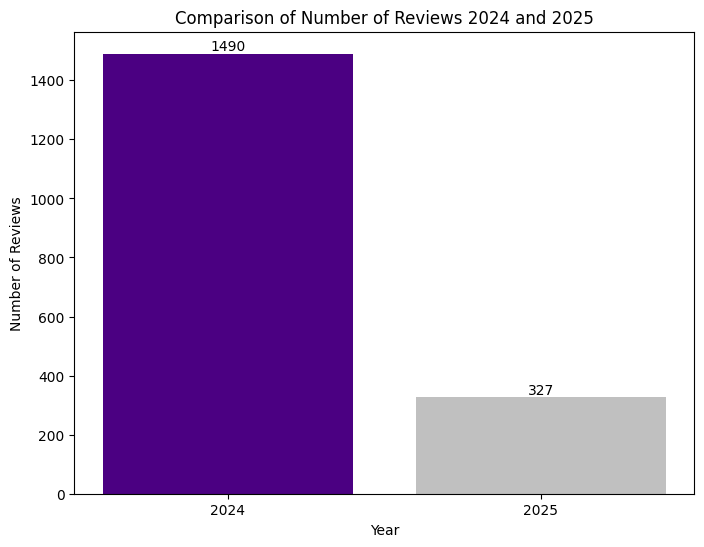

In [6]:
# Display a comparison of the number of review data in 2024 and 2025 using a bar graph.

review2024 = sum(df['at'].str.startswith('2024'))
review2025 = sum(df['at'].str.startswith('2025'))

data = {'Tahun': ['2024', '2025'], 'Jumlah Review': [review2024, review2025]}
df_chart = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
bars = plt.bar(df_chart['Tahun'], df_chart['Jumlah Review'], color=['indigo', 'silver'])
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Comparison of Number of Reviews 2024 and 2025")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.show()

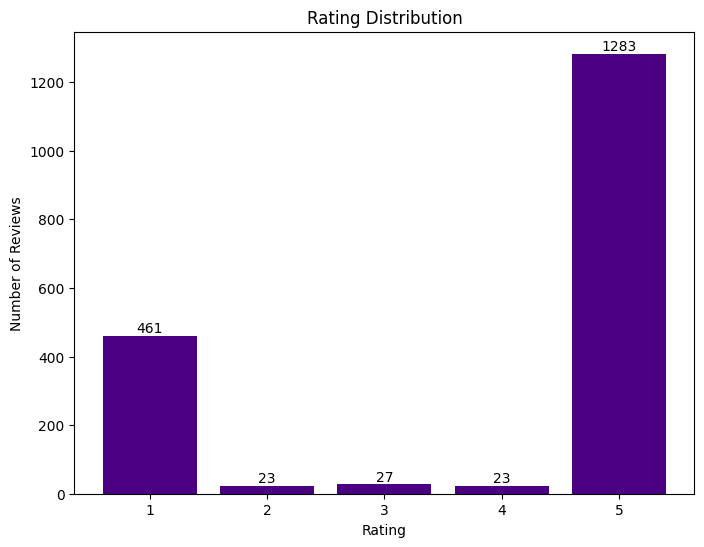

In [7]:
# Display the distribution of data in the score column using a bar graph.

import matplotlib.pyplot as plt
import pandas as pd

rating_counts = df['score'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color='indigo')
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Rating Distribution")
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

plt.show()

# C. Preprocessing

In [8]:
# Splitting review data by year uploaded.

df2024 = df[df['at'].str.startswith("2024")]
df2025 = df[df['at'].str.startswith("2025")]

# Selecting the columns to use (Only on 2024 review data)

df = df2024.loc[:, ['userName', 'content', 'score']]
df.head()

,userName,content,score
38,Siti Rokayah,Aplikasi ini benar-benar membantu saya memaham...,5
39,Victor (Victor),"Improvement semakin mengarah ke arah yg baik, ...",5
40,nana na,"aplikasi nya bagus , mantap berita ekonomi glo...",5
41,Sinta Klara,Akademi cypto sangat luar biasa. Sangat bagus ...,5
42,Raka Eka,Aplikasinya mudah. sangat membantu untuk catat...,5


In [9]:
# Removes data containing NaN values and also duplicates in the "content" column.

df = df.dropna(subset=['content']).drop_duplicates()

In [10]:
# Cleans up text by removing stop words, non-alphabetic characters, and converting all words to lowercase.

stop_words = stopwords.words('indonesian') + stopwords.words('english') + ["yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh"]
df['content'] = df['content'].apply(lambda x: [word.lower() for word in word_tokenize(x) if (word.isalpha() and word.lower() not in stop_words)])

In [11]:
# Change the "content" column from a column containing a list of words to a column containing strings.

df['content'] = df['content'].apply(lambda x: ' '.join(x))
df.head()

,userName,content,score
38,Siti Rokayah,aplikasi membantu memahami dunia crypto sederh...,5
39,Victor (Victor),improvement mengarah arah jujur pelajaran meny...,5
40,nana na,aplikasi bagus mantap berita ekonomi global ap...,5
41,Sinta Klara,akademi cypto bagus pemula materi disajikan te...,5
42,Raka Eka,aplikasinya mudah membantu catatan keuangan ha...,5


In [12]:
# Stemming each word using the Sastrawi library.

stemmer = StemmerFactory().create_stemmer()
df['content'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df.head(5)

,userName,content,score
38,Siti Rokayah,aplikasi bantu paham dunia crypto sederhana mu...,5
39,Victor (Victor),improvement arah arah jujur ajar sesal join re...,5
40,nana na,aplikasi bagus mantap berita ekonomi global ap...,5
41,Sinta Klara,akademi cypto bagus mula materi saji struktur ...,5
42,Raka Eka,aplikasi mudah bantu catat uang hari malas spt...,5


In [13]:
# Perform sentiment analysis, add sentiment labels to each review, and insert them into a new column.

analyzer = SentimentIntensityAnalyzer()

additional_lexicon_id = {
    'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'tomlol': -0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'scam': -0.9,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 0,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}

analyzer.lexicon.update(additional_lexicon_id)

df['sentimen'] = df['content'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

df

,userName,content,score,sentimen
38,Siti Rokayah,aplikasi bantu paham dunia crypto sederhana mu...,5,Netral
39,Victor (Victor),improvement arah arah jujur ajar sesal join re...,5,Positif
40,nana na,aplikasi bagus mantap berita ekonomi global ap...,5,Positif
41,Sinta Klara,akademi cypto bagus mula materi saji struktur ...,5,Positif
42,Raka Eka,aplikasi mudah bantu catat uang hari malas spt...,5,Positif
...,...,...,...,...
1810,Salman Rusdi,good bestt,5,Positif
1811,Mas Danang,kmn,5,Netral
1812,RIDWAN,good aplikasi,5,Positif
1813,Pejuank Chuan,bintang,5,Netral


In [14]:
# Converting text data into a numeric representation that can be used by machine learning algorithms.

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['content'])

# D. Sentiment Analysis

### Word Cloud

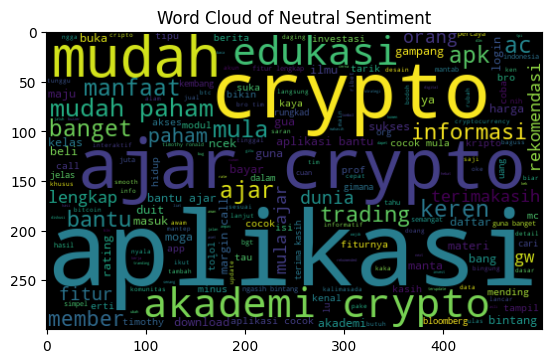

In [15]:
# Showing a word cloud of neutral sentiment.

df_netral = df[df['sentimen'] == 'Netral']
all_words_netral = ' '.join([twts for twts in df_netral['content']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
plt.title('Word Cloud of Neutral Sentiment')
plt.show()

From the neutral sentiment word cloud results above, we can see various user perceptions that can be considered as neutral assessments. Although they do not have negative or positive values, the words that appear can still provide useful insights for us as analysts, as well as for developers and owners of applications. We can divide some of the keywords in the neutral word cloud visualization above into several groups to see useful insights, including:

- **Neutral Words:** From the neutral word cloud visualization above, there are words that have neutral values ​​and do not indicate either negative or positive sentiment. Some words that have neutral values ​​include "aplikasi," "crypto," "edukasi," "informasi," "ajar," "akademi," and others. Although they do not have positive or negative sentiment values, these words can still provide a general picture of what users are trying to convey.

- **Words Related to Suggestions and Expectations:** In addition to neutral words, by looking at the neutral word cloud visualization above, we can also see words that are related to suggestions and expectations that users might try to convey such as "tambah," "moga," "mending," "coba," "bikin," "update," and others. These words can be an indicator for application owners and developers that the Akademi Crypto application may need to improve various things such as features and quality that users might want.

- **Words Related to Functionality:** By looking at the word cloud above, we can also see that there are things related to functionality that users might try to convey such as the words "login," "akses," "buka," "download," and various other words that may contain positive values ​​(such as praise for the function) or may contain negative values ​​(such as the discovery of bugs or deficiencies in the function), which may need to be checked by developers or application owners.

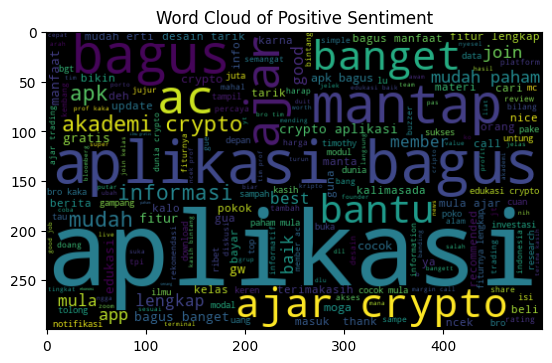

In [16]:
# Showing a word cloud of positive sentiment.

df_positif = df[df['sentimen'] == 'Positif']
all_words_positif = ' '.join([twts for twts in df_positif['content']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud of Positive Sentiment')
plt.show()

From the analysis results of words with positive sentiments seen above, we can see various user perceptions that reflect optimistic assessments. Although not explicitly stating negative views, the words that appear can still provide valuable insights for us as analysts, as well as for developers and application owners. We can divide some keywords in the positive word visualization above into several groups to see useful insights, including:

- **Words With Complimentary Value:** We can see words like "bagus," "nice," "best," "good," "terimakasih," "mantap," "recommended," "keren," and various other words that contain positive sentiment values. This could indicate that many users of the Akademi Crypto application appreciate the performance of the application and thank the developers for what they have created. Some of these words can also be concluded as indicators of user satisfaction with the Akademi Crypto application.
  
- **Appreciation of Features:** In addition to words that have a value of praise, there are also words that indicate appreciation for the features in the Akademi Crypto application. This can be seen by looking at several words such as "desain," "call," "fitur," "akses," "materi," "mudah," "berita," "lengkap," "cocok," "pemula," and various other words that are identified as appreciation for the existing features. These words can conclude that there is a strong positive sentiment towards the features in the Akademi Crypto application.

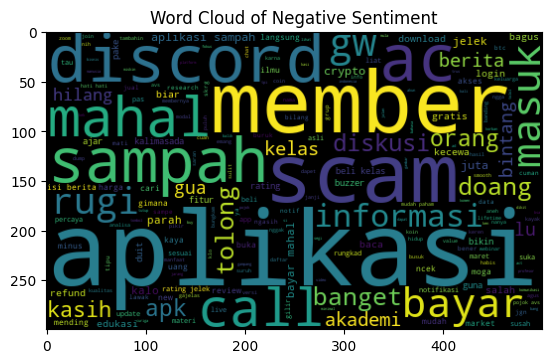

In [17]:
# Showing a word cloud of negative sentiment.

df_negatif = df[df['sentimen'] == 'Negatif']
all_words_negatif = ' '.join([twts for twts in df_negatif['content']])
wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

plt.imshow(wordcloud_negatif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud of Negative Sentiment')
plt.show()

From the negative sentiment word cloud visualization results above, we can see that there is a lot of negative feedback given by users regarding the Akademi Crypto application. Although we have previously seen a lot of positive sentiment given, it does not mean that there is no negative sentiment given by users. These various negative sentiments can later be used as indicators to improve the quality and features of the Akademi Crypto application. The results of the negative sentiment analysis include:

- **Words With Negative Value:** We can clearly see several words that have negative sentiment values printed in large and clear letters on the word cloud visualization above. These words include sampah," "jelek," "busuk," "lawak," "tipu," "scam," "buruk," "kecewa," and various other words that indicate anger from users towards the Crypto Academy application as a whole. From the results of this sentiment, developers and application owners must be able to further analyze why users can give negative feedback with words like the ones mentioned above.

- **User Financial Loss:** In addition to words that are purely negative, there are also various feedbacks containing elements of disappointment regarding financial losses experienced by users after joining the Akademi Crypto application. Words such as "rugi," "rungkad," "duit," "modal," "hilang," "uang," "minus," and various other words clearly indicate negative sentiments given by users due to the losses they experienced. The developers and application owners must evaluate this thoroughly to ensure that this loss is no longer felt by users in the future.

- **Feature Related Criticism:** Not only negative feedback due to financial losses, users also provide negative feedback related to the features in the application. This can be clearly seen in the word cloud visualization containing words such as "login," "akses," "sulit," "live," "discord," "notifikasi," "berita," "salah," and various words related to other features conveyed by users. From these words, we can conclude that there may be problems with login access and various features such as notifications, live, and news that may not be in accordance with what users expect.

### Sentiment Distribution

In [18]:
# Displays the number of reviews based on their sentiment.

temp = df.groupby('sentimen').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentimen,content
1,Netral,702
2,Positif,566
0,Negatif,222


<Axes: xlabel='sentimen', ylabel='count'>

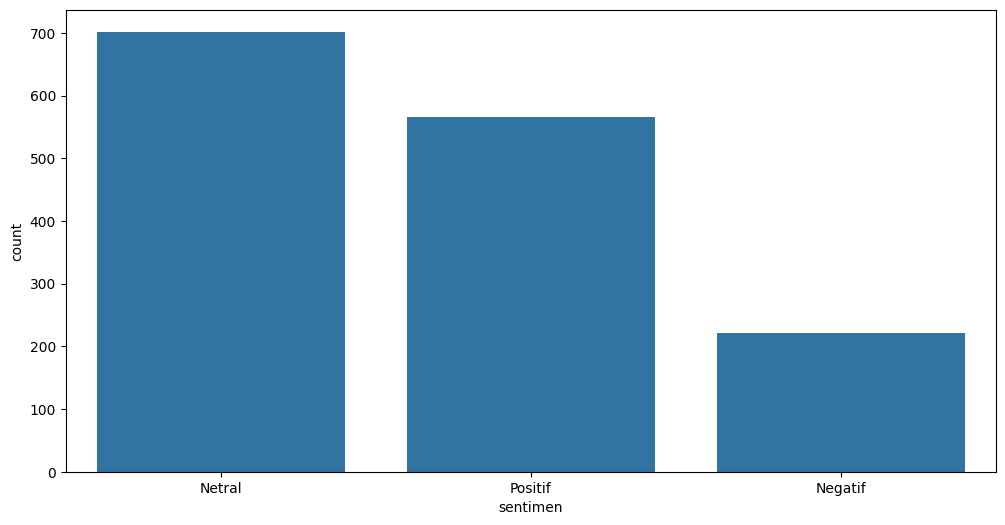

In [19]:
# Visualizing the comparison of review counts each sentiments.

plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=df)

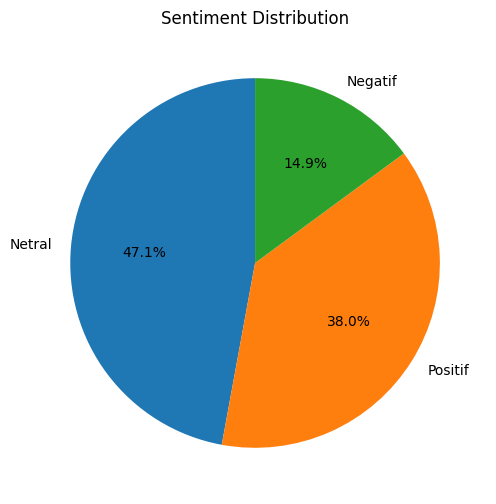

In [20]:
# Showing a pie chart of review sentiment percentages.

sentimen_counts = df['sentimen'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentimen_counts.values, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution")
plt.show()

From various visualizations such as bar and pie charts above, we can see that the Akademi Crypto application review data in 2024 contains 47.1% neutral sentiment and 38% positive sentiment. Meanwhile, negative sentiment was recorded at 14.9%. By knowing the distribution of each sentiment, developers can better understand how users view and evaluate their applications.

### Donut Plot

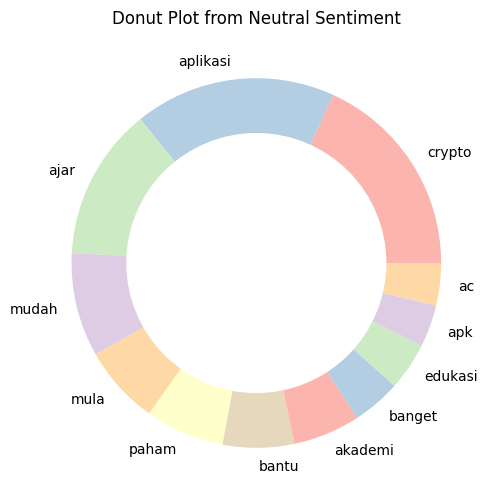

In [21]:
# Showing donut plot for neutral sentiment.

unique_netral_words = df_netral['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_netral_words.columns = ['words', 'count']
top_20_words = unique_netral_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot from Neutral Sentiment')
plt.show()

The neutral sentiment donut plot analysis shows the distribution of words that have neutral connotations related to learning apps. The word "aplikasi" itself dominates, perhaps indicating mentions of apps without strong assessments. The words "ajar" and "mudah" show a focus on the learning aspect and ease of use, albeit in a neutral context. Other words such as "crypto," "AC," "APK," "edukasi," "banget," and "akademi" appear with lower frequencies, indicating contexts that do not provide significant positive or negative assessments.

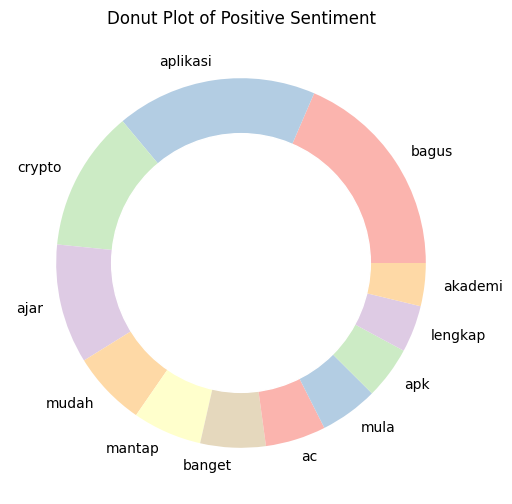

In [22]:
# Showing donut plot for positive sentiment.

unique_positif_words = df_positif['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_positif_words.columns = ['words', 'count']
top_20_words = unique_positif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot of Positive Sentiment')
plt.show()

Positive sentiment donut plot analysis shows the dominance of the words “aplikasi” and “bagus,” indicating an overall positive perception of the learning app. The words “mudah” and “mantap” emphasize the ease of use and high quality of the app. The word “ajar” shows appreciation for effective learning methods. Other words such as "crypto," "akademi," "lengkap," "apk," "mula," and "ac," although contributing to positive sentiment, have lower frequencies. To improve the app, the focus should remain on ease of use and effective teaching methods, as well as feature expansion based on deeper sentiment analysis to understand the context of positive word usage and identify areas for improvement.

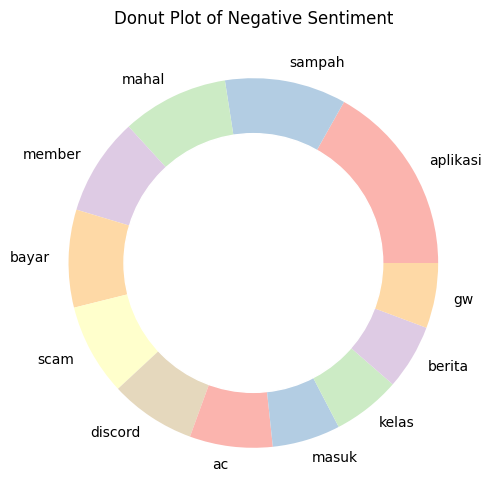

In [23]:
# Showing donut plot for positive sentiment.

unique_negatif_words = df_negatif['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_negatif_words.columns = ['words', 'count']
top_20_words = unique_negatif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot of Negative Sentiment')
plt.show()

The negative sentiment donut plot analysis reveals several critical points regarding the learning app. The words “mahal” and “sampah” indicate user dissatisfaction with the price or quality of the app. The word “scam” indicates suspicion of fraudulent practices. The word “aplikasi” appears in negative sentiment, indicating significant issues directly related to the app itself. Other words such as "member," "bayar," "gw," "berita," "kelas," "masuk," "discord," and "ac" appear with lower frequency, but still indicate areas for improvement. Overall, this donut plot highlights the need for further investigation into issues of price, app quality, and potential suspicious practices, in order to improve user satisfaction and address existing negative sentiment.

# E. Training and Evaluating the Model

In [24]:
# Split the data into training data and test data.

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentimen'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1192, 2317), (298, 2317))

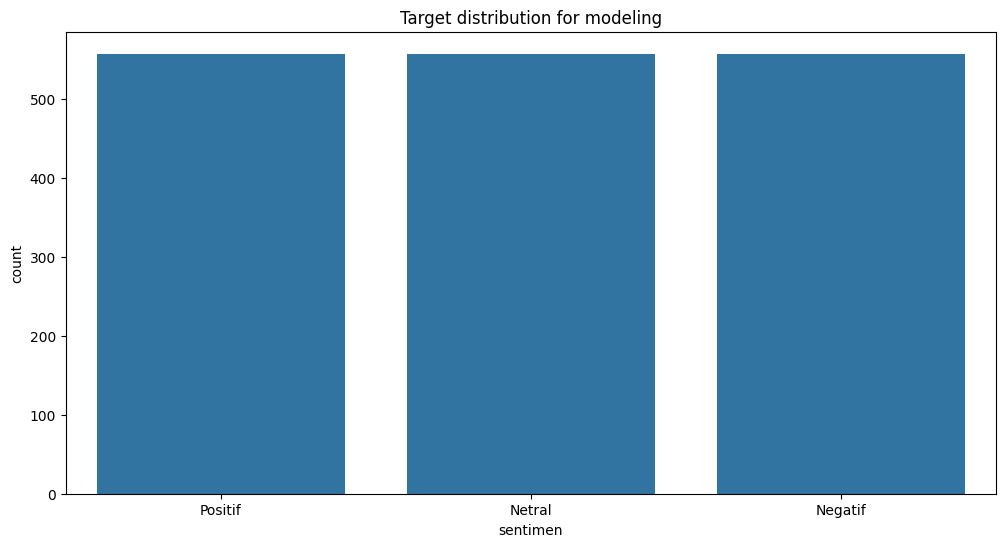

In [25]:
# Using SMOTE to generate synthetic samples for balanced sentiment.

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Target distribution for modeling')
plt.show()

In [26]:
# Create a grid of hyperparameter combinations to explore during model training.

rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [27]:
# Finding optimal hyperparameters for a Random Forest model using a randomized approach.

rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [28]:
# Shows the optimal hyperparameters selected by the hyperparameter search algorithm for the Random Forest model.

print("\nBest Parameters for Random Forest:", rf_model.best_params_)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [29]:
# Evaluating the performance of a Random Forest model that has been optimized with the best hyperparameters on test data.

y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.80      0.76      0.78        49
      Netral       0.89      0.98      0.93       145
     Positif       0.97      0.86      0.91       104

    accuracy                           0.90       298
   macro avg       0.89      0.86      0.87       298
weighted avg       0.90      0.90      0.90       298



# Applying the Model to the 2025 Review Data

In [30]:
# Selecting the columns to use from the 2025 review data.

df2025 = df2025.loc[:, ['userName', 'content', 'score']]

In [31]:
# Converting text data from a DataFrame into a numeric matrix using TF-IDF technique.

X_2025 = tfidf_vectorizer.transform(df2025['content'])

In [32]:
# Performing sentiment label predictions for 2025 review data based on previously created models.

y_pred_2025 = rf_model.predict(X_2025)

# Enter the prediction into a new column called "sentimen".

df2025['sentimen'] = y_pred_2025

In [33]:
# Displays the latest data that has a sentiment label for each row.

df2025.head(20)

,userName,content,score,sentimen
0,Cuk,Kadang waktu baca research ga bisa di geser la...,5,Netral
1,Rahmi Ashari,Akademi crypto sangat bagus dan mantul sih.san...,5,Positif
2,Sri Muningar,"Awalnya ragu mencoba Akademi Crypto, tapi tern...",5,Netral
3,Matalis Can,"sangat cocok buat pemula seperti saya, awalnya...",5,Netral
4,Lale Less,Kenapa modulnya bolong beberapa. Contohnya Say...,5,Positif
5,Reka,Aplikasi akademi crypto ini aplikasi yang reko...,5,Netral
6,uswaa,"Aplikasinya mantap baguss, mudah dipahami, dan...",5,Positif
7,jhon keple,Aplikasinya mantap. Banyak artikel yg membahas...,5,Positif
8,Bagas Wae,Gua rasa aplikasi ini sudah sangat lengkap dar...,5,Netral
9,RIFKI RAMADAN,Akademi Crypto adalah aplikasi edukasi crypto ...,5,Netral


From the output of the 2025 review data table above, we can see a new column called "sentiment" which is the result of sentiment prediction using the model we created earlier. Thus, we can conclude that the model we previously built with the 2024 review data can run well and can predict sentiment labels for review data in the following years.